# OK Cupid Dataset

This dataset consist of a majority of catagorical veriables, there fore my approach to this will be: 

    1) preliminary data exploration
    2) data cleaning 
    3) filling in missing values
    4) encoding catagorical values
    5) unbiasing the data

In [1]:
# Import libraries 

# Import data science libraries 
import pandas as pd
import re # regulate expression library 
import numpy as np

# Import data visualisation libraries
from matplotlib import pyplot as plt
import seaborn as sns

# import csv library
import csv

# Import data splitting librar
from sklearn.model_selection import train_test_split

#Import machine learning algorithm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

#Import metrics
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
# Load dataset direct from PC, importing form website would require a direct URL from the UCL website
okcupid = pd.read_csv('Desktop/Data Science Career Change/WIP Projects/WIP OK Cupid/OKCupid-Date-A-Scientist-Starter/OKCupid-Date-A-Scientist-Starter/profiles.csv',encoding='utf-8')


# Preliminary Data Exploration 

In [3]:
okcupid.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
okcupid['status'].value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

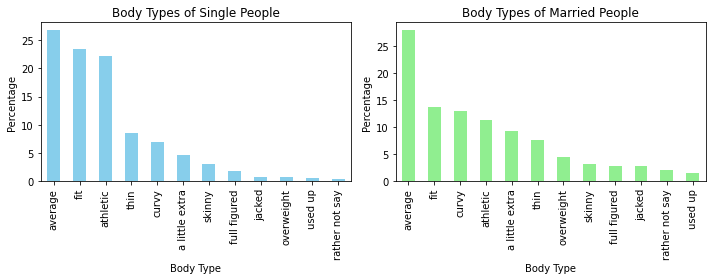

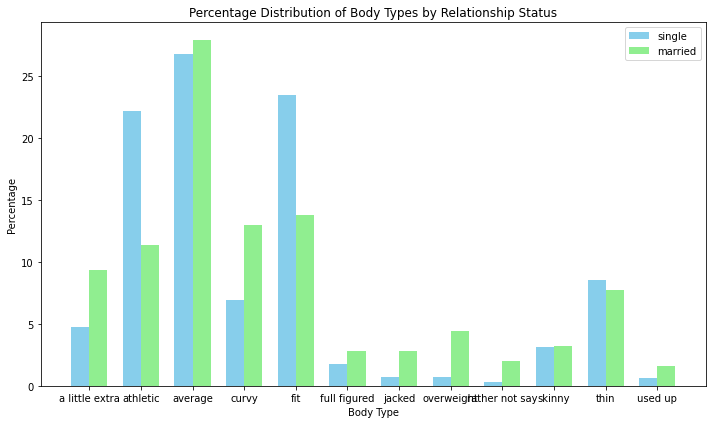

In [5]:
# Create a DataFrame
df = pd.DataFrame(okcupid)

# Filter data for 'Single' and 'Fit'
single_data = okcupid[okcupid['status'] == 'single']
married_data = okcupid[okcupid['status'] == 'married']

# Count body types
single_body_counts = single_data['body_type'].value_counts(normalize=True) *100
married_body_counts = married_data['body_type'].value_counts(normalize=True) *100

# Plot for 'Single'
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
single_body_counts.plot(kind='bar', color='skyblue')
plt.title('Body Types of Single People')
plt.xlabel('Body Type')
plt.ylabel('Percentage')

# Plot for 'Fit'
plt.subplot(1, 2, 2)
married_body_counts.plot(kind='bar', color='lightgreen')
plt.title('Body Types of Married People')
plt.xlabel('Body Type')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()

####################


# Align data for plotting
body_types = sorted(set(single_body_counts.index).union(set(married_body_counts.index)))
single_percent = [single_body_counts.get(bt, 0) for bt in body_types]
married_percent = [married_body_counts.get(bt, 0) for bt in body_types]

# Plot grouped bar chart
x = np.arange(len(body_types))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, single_percent, width, label='single', color='skyblue')
ax.bar(x + width/2, married_percent, width, label='married', color='lightgreen')

# Add labels and title
ax.set_xlabel('Body Type')
ax.set_ylabel('Percentage')
ax.set_title('Percentage Distribution of Body Types by Relationship Status')
ax.set_xticks(x)
ax.set_xticklabels(body_types)
ax.legend()

plt.tight_layout()
plt.show()



In [6]:
# We can see there are some general characteristic differences between sincle and married people whic may allow predications 
# to be be made 

C:\Users\mndpg\Anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


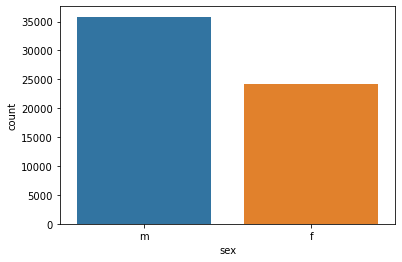

In [7]:
sns.countplot(okcupid["sex"])
plt.show()

# How many single meals compared to femails


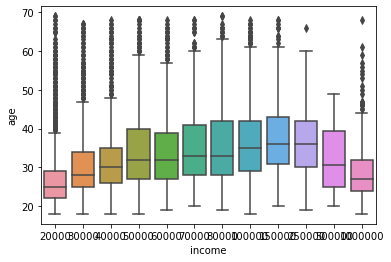

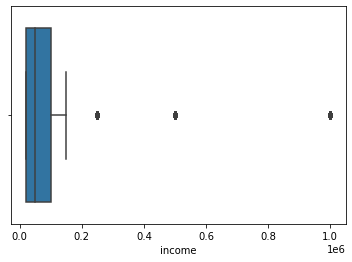

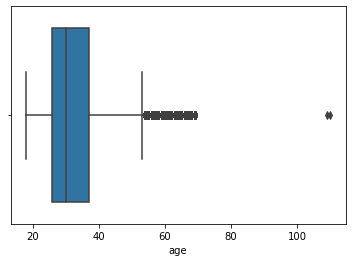

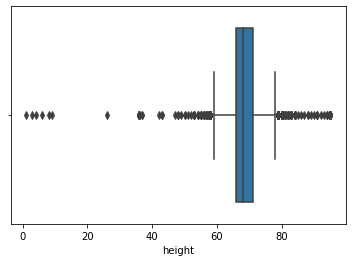

In [8]:

# Create the plot
filtered_income = okcupid[okcupid['income'] > 1000 & (okcupid['income'] < 1000000)]

sns.boxplot(x='income', y='age',  data=filtered_income)
plt.show()

sns.boxplot(x='income',  data=filtered_income)
plt.show()

sns.boxplot(x='age',  data=okcupid)
plt.show()


sns.boxplot(x='height',  data=okcupid)
plt.show()



In [9]:
okcupid['income'].value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

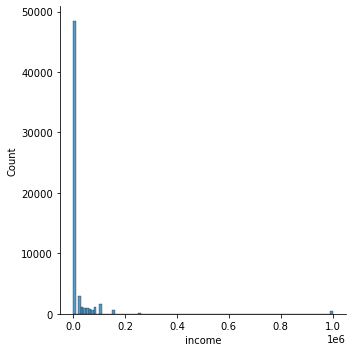

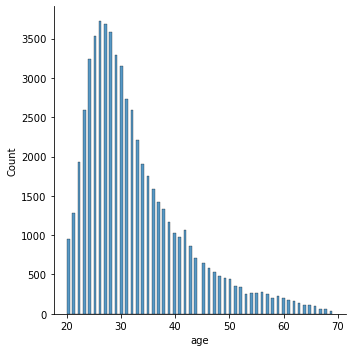

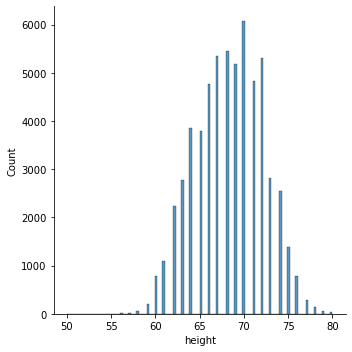

In [10]:
# historgram 

# X > age of population
# Y > status (single as a line history plot and then add other catagories)

# For histogram 2 substitute status for diet etc...

# histogram
sns.displot(okcupid.income, bins=100, kde=False)
plt.show()

# Filter the DataFrame to include only rows where height is between 50 and 80
filtered_age = okcupid[(okcupid['age'] >= 20) & (okcupid['age'] <= 70)]
# Create a histogram of the height column from the filtered data
sns.displot(filtered_age['age'], bins=100, kde=False)
plt.show()

# Filter the DataFrame to include only rows where height is between 50 and 80
filtered_height = okcupid[(okcupid['height'] >= 50) & (okcupid['height'] <= 80)]
# Create a histogram of the height column from the filtered data
sns.displot(filtered_height['height'], bins=100, kde=False)
plt.show()




C:\Users\mndpg\Anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


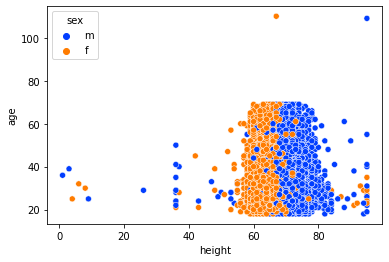

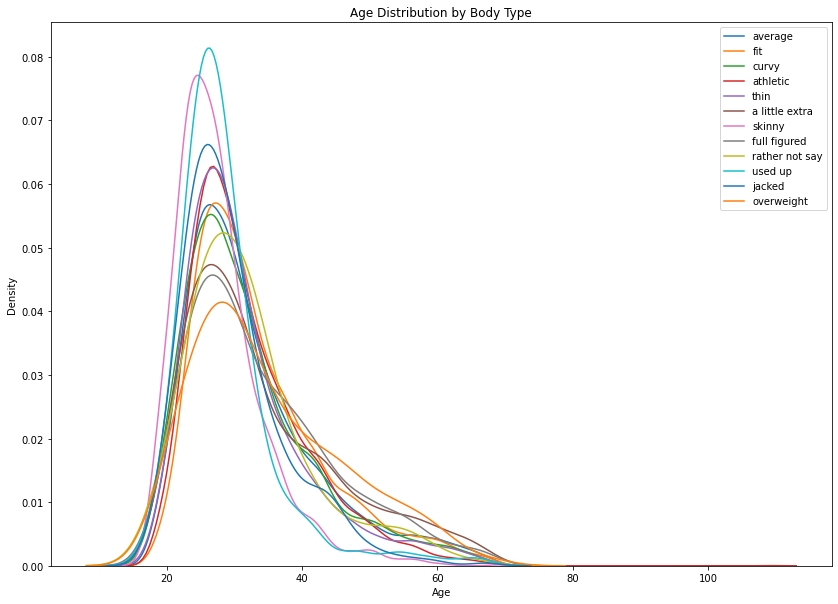

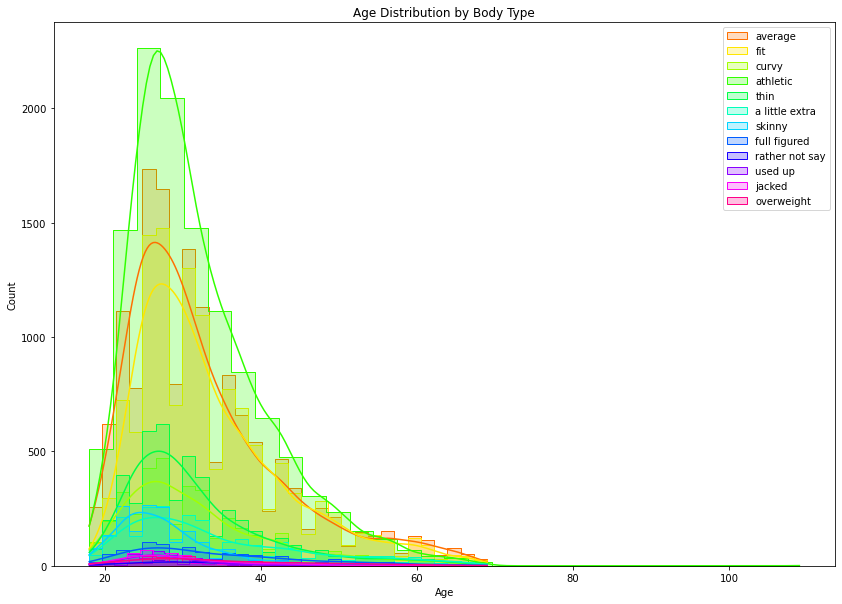

In [11]:
# Multivaliate analysis 
sns.scatterplot(okcupid.height, okcupid.age, hue = okcupid.sex, palette='bright')
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame
# Assuming 'okcupid' is your DataFrame with 'body_type' and 'age' columns

# Filter for specific body types
selected_body_types = ['average', 'fit', 'curvy', 'athletic', 'thin', 'a little extra','skinny', 'full figured', 'rather not say', 'used up', 'jacked', 'overweight' ]
filtered_data = okcupid[okcupid['body_type'].isin(selected_body_types)]

# Create a line plot for each body type
plt.figure(figsize=(14, 10))

for body_type in selected_body_types:
    subset = filtered_data[filtered_data['body_type'] == body_type]
    sns.kdeplot(subset['age'], label=body_type, fill=False)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Body Type')
plt.legend()

plt.show()

######
palette = sns.color_palette("hsv", len(selected_body_types))


# Create a line plot for each body type
plt.figure(figsize=(14, 10))

for i, body_type in enumerate(selected_body_types):
    subset = filtered_data[filtered_data['body_type'] == body_type]
    sns.histplot(subset['age'], label=body_type, bins=30, kde=True, element='step', stat='count', color=palette[i], alpha = 0.25)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Body Type')
plt.legend()

plt.show()



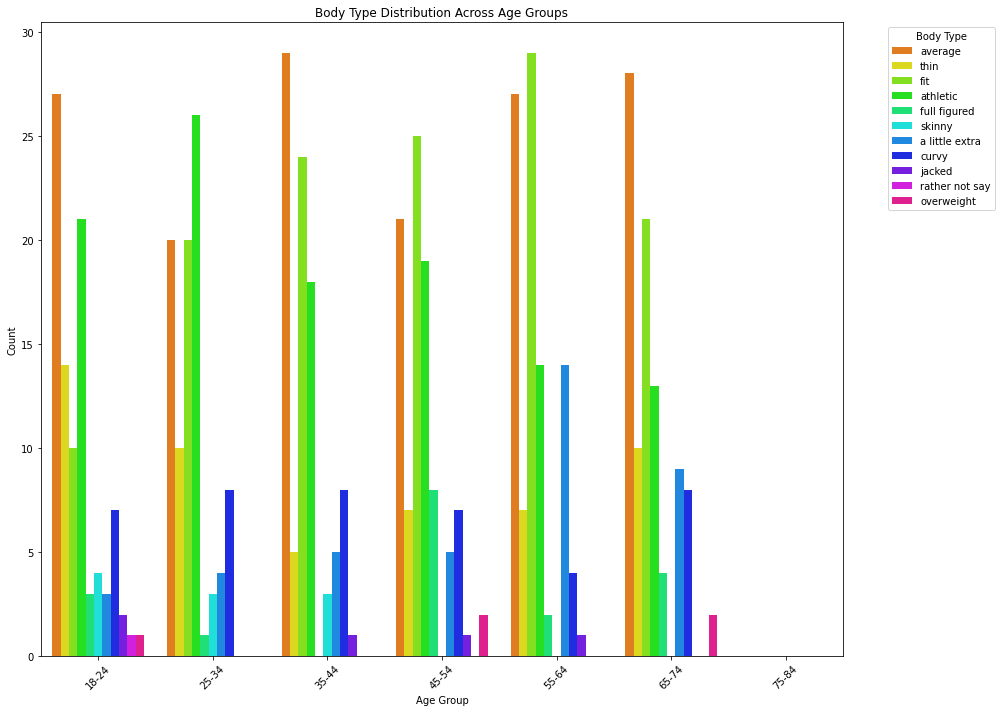

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame
# Assuming 'okcupid' is your DataFrame with 'body_type' and 'age' columns

# Define age bins
age_bins = [18, 25, 35, 45, 55, 65, 75, 85]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84']

# Create age groups
okcupid['age_group'] = pd.cut(okcupid['age'], bins=age_bins, labels=age_labels, right=False)

# Stratified sampling: sample equal number from each age group
sampled_data = okcupid.groupby('age_group').apply(lambda x: x.sample(n=min(len(x), 100), random_state=1)).reset_index(drop=True)

# Plot the distribution of body types within each age group
plt.figure(figsize=(14, 10))
sns.countplot(data=sampled_data, x='age_group', hue='body_type', palette='hsv')
plt.title('Body Type Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Body Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
# Group by 'sex' and count occurrences in 'drugs'
drug_counts_by_sex = okcupid.groupby('sex')['drugs'].value_counts()

# Display the result
print(drug_counts_by_sex)


sex  drugs    
f    never        15829
     sometimes     2695
     often          128
m    never        21895
     sometimes     5037
     often          282
Name: drugs, dtype: int64


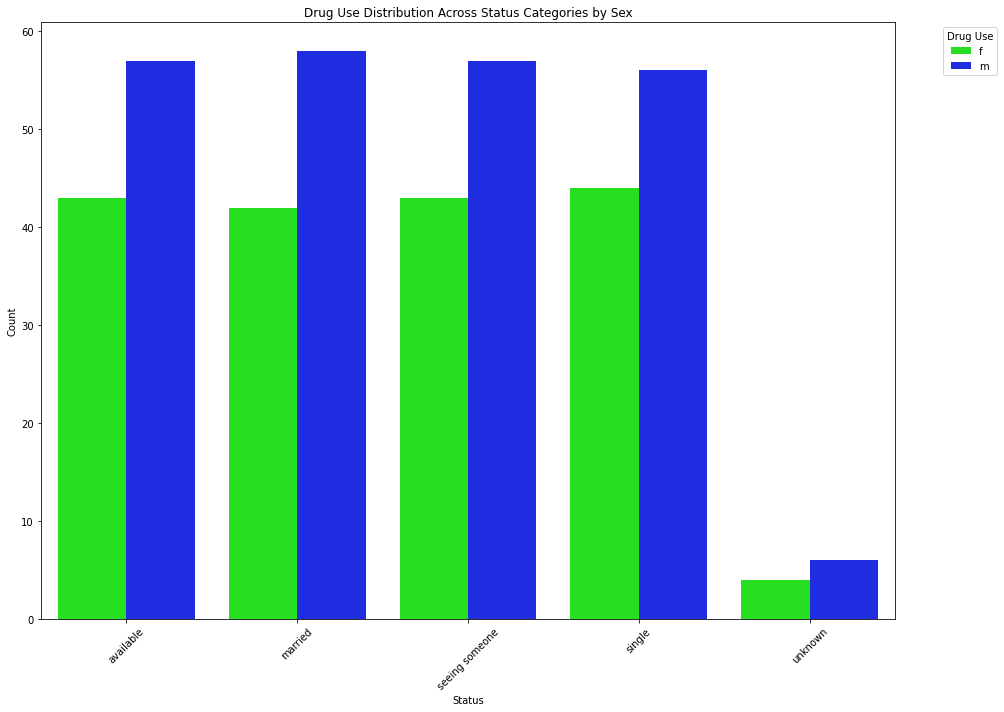

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stratified sampling: sample equal number from each status category
sampled_data = okcupid.groupby('status').apply(lambda x: x.sample(n=min(len(x), 100), random_state=1)).reset_index(drop=True)

# Plot the distribution of drug use within each status category, incorporating sex
plt.figure(figsize=(14, 10))
sns.countplot(data=sampled_data, x='status', hue='sex', palette='hsv')
plt.title('Drug Use Distribution Across Status Categories by Sex')
plt.xlabel('Status')
plt.ylabel('Count')
plt.legend(title='Drug Use', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



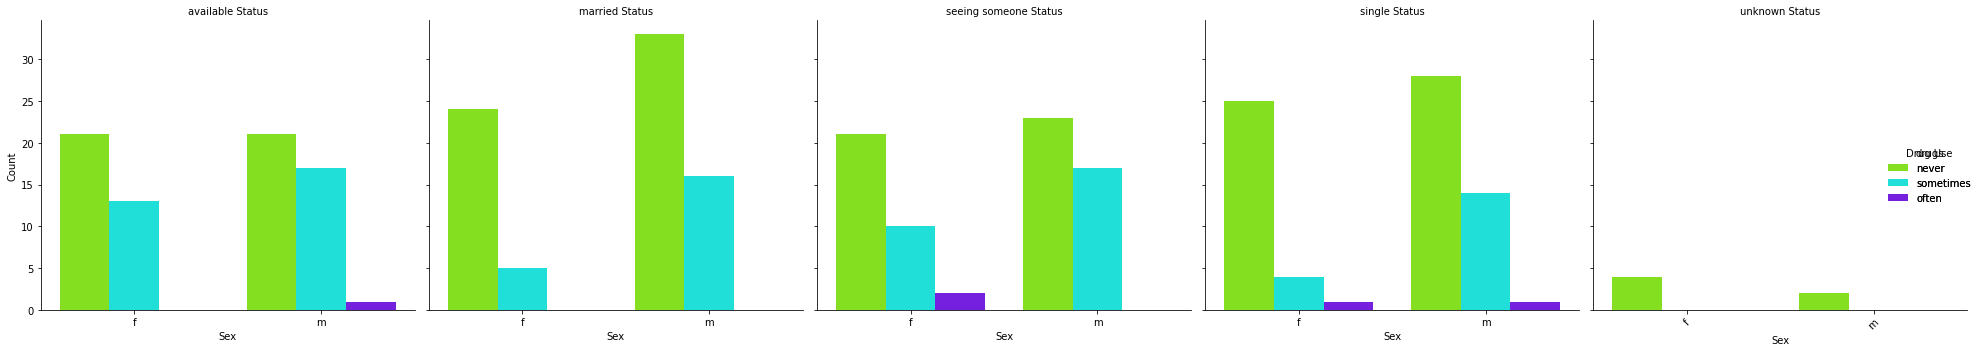

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sampled_data = okcupid.groupby('status').apply(lambda x: x.sample(n=min(len(x), 100), random_state=1)).reset_index(drop=True)

# Create a categorical plot with separate plots for each status
g = sns.catplot(
    data=sampled_data,
    x='sex',
    hue='drugs',
    col='status',
    kind='count',
    palette='hsv',
    height=5,
    aspect=1
)

g.set_axis_labels("Sex", "Count")
g.set_titles("{col_name} Status")
g.add_legend(title='Drug Use')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [16]:
okcupid.shape

(59946, 32)

In [17]:
okcupid.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [18]:
print(okcupid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          59946 non-null  int64   
 1   body_type    54650 non-null  object  
 2   diet         35551 non-null  object  
 3   drinks       56961 non-null  object  
 4   drugs        45866 non-null  object  
 5   education    53318 non-null  object  
 6   essay0       54458 non-null  object  
 7   essay1       52374 non-null  object  
 8   essay2       50308 non-null  object  
 9   essay3       48470 non-null  object  
 10  essay4       49409 non-null  object  
 11  essay5       49096 non-null  object  
 12  essay6       46175 non-null  object  
 13  essay7       47495 non-null  object  
 14  essay8       40721 non-null  object  
 15  essay9       47343 non-null  object  
 16  ethnicity    54266 non-null  object  
 17  height       59943 non-null  float64 
 18  income       59946 non-nul

In [19]:
# Examine rows with Missing Values 
okcupid[okcupid.isnull().any(axis=1)] # filter any rows to include any row whose value is null

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,age_group
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,35-44
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,35-44
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,18-24
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,25-34
5,29,average,mostly anything,socially,NaN,graduated from college/university,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,...,"doesn&rsquo;t have kids, but might want them",straight,likes cats,atheism,m,taurus,no,"english (fluently), chinese (okay)",single,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59939,52,NaN,NaN,socially,never,graduated from college/university,hi there and thanks for checking out my profil...,i'm spending time enjoying the best job i've e...,"making cool electronic stuff, being someone pe...",i needed an expert opinion for this section so...,...,doesn&rsquo;t want kids,straight,likes dogs and has cats,NaN,m,pisces and it&rsquo;s fun to think about,no,english (fluently),single,45-54
59940,31,NaN,NaN,socially,never,working on masters program,"real deal: i am sensitive (sorry, tears includ...",right now...watching 'celebrity rehab' and com...,eating chocolate and doing pilates (usually no...,my hair? eyes? height? curves? dk....my caring...,...,NaN,straight,likes dogs,agnosticism,f,sagittarius,no,"english (fluently), french, farsi",single,25-34
59941,59,NaN,NaN,socially,never,graduated from college/university,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",...,has kids,straight,has dogs,catholicism but not too serious about it,f,cancer and it&rsquo;s fun to think about,no,english,single,55-64
59943,42,average,mostly anything,not at all,never,graduated from masters program,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively<br />\n- getti...,i'm quiet until i get used to the environment ...,...,doesn&rsquo;t have kids,straight,NaN,christianity but not too serious about it,m,sagittarius but it doesn&rsquo;t matter,no,english (fluently),single,35-44


In [20]:
print(okcupid.drugs.unique()) # print all unique values in a particular column
print(okcupid.ethnicity.unique())

['never' 'sometimes' nan 'often']
['asian, white' 'white' nan 'asian, black, other' 'white, other'
 'hispanic / latin, white' 'hispanic / latin' 'pacific islander, white'
 'asian' 'black, white' 'pacific islander' 'asian, native american'
 'asian, pacific islander' 'black, native american, white'
 'middle eastern, other' 'native american, white' 'indian' 'black'
 'black, native american, hispanic / latin, other'
 'black, native american, hispanic / latin'
 'asian, black, pacific islander'
 'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other'
 'other' 'hispanic / latin, other' 'asian, black' 'middle eastern, white'
 'native american, white, other' 'black, native american'
 'black, white, other' 'hispanic / latin, white, other' 'middle eastern'
 'black, other' 'native american, hispanic / latin, white' 'black, indian'
 'indian, white, other' 'middle eastern, indian, other'
 'black, native american, hispanic / latin, white, other'
 'pac

Conclusion 

# Data Cleaning, Wrangling and Tidying 

Preliminary data cleaning

In [21]:
# From priliminary observation I cannot detect any duplicate rows 
# the .drop_duplicates() function removes duplicate rows
okcupidd = okcupid.drop_duplicates() 

# Total number of rows
total_rows = len(okcupid)

# Number of unique rows
unique_rows = len(okcupid.drop_duplicates())

# Number of duplicate rows
duplicate_rows = total_rows - unique_rows

# Print the number of duplicates
print("Number of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


In [22]:
# it looks like all of the data is in lowercase, however I will scan the data to make sure.
okcupid.columns = map(str.lower, okcupid.columns)

In [23]:
# axis=1` refers to the columns, `axis=0` would refer to the rows
# In the dictionary the key refers to the original column name and the value refers to the new column name {'oldname1': 'newname1', 'oldname2': 'newname2'}
okcupid = okcupid.rename({'essay0': 'about_me', 'essay1': 'employment', 'essay2': 'hobbies' ,'essay3': 'appearance','essay4': 'fouvourite_music_and_tv','essay5': 'likes','essay6': 'aspirations','essay7': 'weekend','essay8': 'fun_fact','essay9': 'ideal_date'}, axis=1)


# the .head(10) function will show us the first 10 rows in our dataset
okcupid.head(1)

,age,body_type,diet,drinks,drugs,education,about_me,employment,hobbies,appearance,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,age_group
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,18-24


In [24]:
okcupid.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'about_me',
       'employment', 'hobbies', 'appearance', 'fouvourite_music_and_tv',
       'likes', 'aspirations', 'weekend', 'fun_fact', 'ideal_date',
       'ethnicity', 'height', 'income', 'job', 'last_online', 'location',
       'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes',
       'speaks', 'status', 'age_group'],
      dtype='object')

In [25]:
# Observing the datasets data types
okcupid.dtypes
# There are three types of variable, interger, object and floats but no bolean variables

age                           int64
body_type                    object
diet                         object
drinks                       object
drugs                        object
education                    object
about_me                     object
employment                   object
hobbies                      object
appearance                   object
fouvourite_music_and_tv      object
likes                        object
aspirations                  object
weekend                      object
fun_fact                     object
ideal_date                   object
ethnicity                    object
height                      float64
income                        int64
job                          object
last_online                  object
location                     object
offspring                    object
orientation                  object
pets                         object
religion                     object
sex                          object
sign                        

We see that our data consists of lots of different appearance which cannot be correct and may require some generalisation, as well as in other catagores. From initial inspection of the dataset there where some missing or NaN data but this does not appear. Therefore it may be usful to explore if there are correlation between the person type, habbits and body type or locaton etc...



In [26]:
# Find the number of unique values in the dataframe

unique_counts = okcupid.nunique()

print(unique_counts)

age                           54
body_type                     12
diet                          18
drinks                         6
drugs                          3
education                     32
about_me                   54350
employment                 51516
hobbies                    48635
appearance                 43533
fouvourite_music_and_tv    49260
likes                      48963
aspirations                43603
weekend                    45554
fun_fact                   39324
ideal_date                 45443
ethnicity                    217
height                        60
income                        13
job                           21
last_online                30123
location                     199
offspring                     15
orientation                    3
pets                          15
religion                      45
sex                            2
sign                          48
smokes                         5
speaks                      7647
status    

## Remove any unecessry information from the strings

1. Understand Your Goal
Define the purpose of your model. Are you classifying text (e.g., sentiment analysis), generating text (e.g., chatbots), or extracting information (e.g., named entity recognition)?

2. Preprocess the Text Data
Clean the text: Remove irrelevant characters, HTML tags, or unnecessary spaces.

Tokenization: Split the text into smaller units like words or sentences.

Lowercasing: Convert text to lowercase for consistency (if case sensitivity isn't critical).

Remove Stopwords: Eliminate common but uninformative words like "the," "and," etc.

Stemming/Lemmatization: Reduce words to their root forms, e.g., "running" → "run."

Handling missing data: If there’s missing text, decide whether to discard or impute based on context.

3. Feature Engineering
Bag of Words (BoW): Represent text as word frequency vectors.

TF-IDF (Term Frequency-Inverse Document Frequency): Weigh words based on importance.

Word Embeddings: Use pre-trained embeddings (e.g., Word2Vec, GloVe) or train your own. Embeddings map words to dense, numerical vectors that capture semantic meaning.

N-grams: Capture context by considering sequences of n words together.

4. Select a Model
Depending on your task, choose a model:

For simpler tasks: Logistic Regression, Naive Bayes, or Random Forest (with text features).

For complex tasks: Use deep learning models like Recurrent Neural Networks (RNNs), LSTMs, GRUs, or Transformer-based models (e.g., BERT, GPT).

5. Split the Dataset
Divide the dataset into training, validation, and test sets (e.g., 80%-10%-10%).

6. Train the Model
Use your chosen model and fine-tune it based on your text representation.

If using pre-trained models, fine-tune them for your specific task with your dataset.

7. Evaluate the Model
Use metrics like accuracy, precision, recall, F1-score (for classification), or BLEU/ROUGE (for text generation) to assess the model’s performance.

8. Iterate and Improve
Experiment with different preprocessing techniques, features, and model architectures to achieve better results.

If you’d like, I can help with specific parts of this process—like choosing the right model or preprocessing techniques! What’s your use case for this dataset?

In [27]:
# String Parsing

# We need to reduce the amount of unique values with the free-text columns to...
    #1) remove unnecessary information reges
    #2) tokenisation
    

okcupid.about_me                = okcupid['about_me'].replace (r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
okcupid.employment              = okcupid['employment'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
okcupid.hobbies                 = okcupid['hobbies'].replace (r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
okcupid.appearance              = okcupid['appearance'].replace (r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
okcupid.fouvourite_music_and_tv = okcupid['fouvourite_music_and_tv'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
okcupid.likes                   = okcupid['likes'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
okcupid.aspirations             = okcupid['aspirations'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
okcupid.weekend                 = okcupid['weekend'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
okcupid.fun_fact                = okcupid['fun_fact'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
okcupid.ideal_date              = okcupid['ideal_date'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)
okcupid.ethnicity               = okcupid['ethnicity'].replace(r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)


# Preliminary Transformation of body type, diet, drinks, drugs, education, job, smaokes, status, location, offspring


# orientation, pets, religion, sex and sign  
# Ethnicy may require refinement to reduce unique valiables
# Speaks may require parsing eg first language, second language and other
# last-online requires parsing

#okcupid.body_type = pd.to_numeric(okcupid['body_type'])

#print(okcupid.body_type[2])
unique_counts = okcupid.nunique()
print(unique_counts)

age                           54
body_type                     12
diet                          18
drinks                         6
drugs                          3
education                     32
about_me                   54341
employment                 51495
hobbies                    48627
appearance                 43434
fouvourite_music_and_tv    49255
likes                      48956
aspirations                43530
weekend                    45488
fun_fact                   39263
ideal_date                 45412
ethnicity                    217
height                        60
income                        13
job                           21
last_online                30123
location                     199
offspring                     15
orientation                    3
pets                          15
religion                      45
sex                            2
sign                          48
smokes                         5
speaks                      7647
status    

In [28]:
# spintting the 'last online' column into individual colums
# this cell contains multiple measurements in a single column, for example, YYYY-MM-DD-HH-MM
# It need to split into individual parts

okcupid['last_online'].value_counts() 

# Create the 'month' column
okcupid['month'] = okcupid.last_online.str[0:2]

# Create the 'day' column
okcupid['day'] = okcupid.last_online.str[3:5]

# Create the 'year' column
okcupid['year'] = okcupid.last_online.str[6:7]

# Create the 'day' column
okcupid['hour'] = okcupid.last_online.str[9:10]

# Create the 'year' column
okcupid['minute'] = okcupid.last_online.str[12:]

'''
this cannot be used as values have already been seperated

okcupid['last_online'] = pd.to_datetime(okcupid['last_online'])

# create new variable for month
okcupid['year'] = okcupid['year'].dt.year

# create new variable for day of the week
okcupid['month'] = okcupid['month'].dt.month

# create new variable for day of the week
okcupid['day'] = okcupid['day'].dt.day

'''

"\nthis cannot be used as values have already been seperated\n\nokcupid['last_online'] = pd.to_datetime(okcupid['last_online'])\n\n# create new variable for month\nokcupid['year'] = okcupid['year'].dt.year\n\n# create new variable for day of the week\nokcupid['month'] = okcupid['month'].dt.month\n\n# create new variable for day of the week\nokcupid['day'] = okcupid['day'].dt.day\n\n"

In [29]:
# print all unique values in a job column
print(okcupid.job.unique())

['transportation' 'hospitality / travel' nan 'student'
 'artistic / musical / writer' 'computer / hardware / software'
 'banking / financial / real estate' 'entertainment / media'
 'sales / marketing / biz dev' 'other' 'medicine / health'
 'science / tech / engineering' 'executive / management'
 'education / academia' 'clerical / administrative'
 'construction / craftsmanship' 'rather not say' 'political / government'
 'law / legal services' 'unemployed' 'military' 'retired']


In [30]:
# Standardising information withint he 'jobs' columns

# Replace 'engineer/maths/science' with 'stem' in the 'subject' column
okcupid['job'] = okcupid['job'].str.replace(r'hospitality / travel', 'hospitality_travel', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'artistic / musical / writer', 'musician', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'computer / hardware / software', 'computing', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'banking / financial / real estate', 'banking_real estate', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'entertainment / media', 'entertainment_media', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'sales / marketing / biz dev', 'sales_marketing', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'medicine / health', 'healthcare', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'science / tech / engineering', 'stem', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'executive / management', 'ceo', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'education / academia', 'teaching', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'clerical / administrative', 'admin', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'construction / craftsmanship', 'construction', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'political / government', 'govenment', regex=True)
okcupid['job'] = okcupid['job'].str.replace(r'law / legal services', 'legal_services', regex=True)

# Save the modified DataFrame back to a CSV file
#df.to_csv('modified_file.csv', index=False)


In [31]:
# for the 'location'

In [32]:
# Further standardising text may further reduce the number of unique values
'''
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('your_file.csv')

# Define a function to replace similar words with 'dog'
def replace_with_dog(text):
    replacements = ['dogs', 'doggy', 'wuff', 'dugs', 'bow wow']
    for word in replacements:
        text = text.replace(word, 'dog')
    return text

# Apply the function to the 'dogs' column
df['dogs'] = df['dogs'].apply(replace_with_dog)

# Optionally, save the modified DataFrame back to a CSV file
df.to_csv('modified_file.csv', index=False)

print(df)
'''

"\nimport pandas as pd\n\n# Load the CSV file into a DataFrame\ndf = pd.read_csv('your_file.csv')\n\n# Define a function to replace similar words with 'dog'\ndef replace_with_dog(text):\n    replacements = ['dogs', 'doggy', 'wuff', 'dugs', 'bow wow']\n    for word in replacements:\n        text = text.replace(word, 'dog')\n    return text\n\n# Apply the function to the 'dogs' column\ndf['dogs'] = df['dogs'].apply(replace_with_dog)\n\n# Optionally, save the modified DataFrame back to a CSV file\ndf.to_csv('modified_file.csv', index=False)\n\nprint(df)\n"

# Remove missing values

In [33]:
# Removing Duplicates

duplicates = okcupid.duplicated()
print(duplicates.head())
print(duplicates.value_counts())
okcupid = okcupid.drop_duplicates()
duplicates = okcupid.duplicated()
print(duplicates.head())
print(duplicates.value_counts())

# Therefore we can observe that there are no duplicates

0    False
1    False
2    False
3    False
4    False
dtype: bool
False    59946
dtype: int64
0    False
1    False
2    False
3    False
4    False
dtype: bool
False    59946
dtype: int64


In [34]:
# To replace NaN values in all columns of a DataFrame, you can use the .fillna() method. Here’s how to do it for all 31 columns:

# Replace NaN values in all columns with a specific value, e.g., 0
#df = df.fillna(0)

# To replace NaN values in a specific column called job, use the .fillna() method on that column. Here’s how:

# Replace NaN values in the 'job' column with a specific value, e.g., 'Unknown'
okcupid['body_type'] = okcupid['body_type'].fillna('undisclosed')
okcupid['diet'] = okcupid['diet'].fillna('other')

# Calculate the mode (most frequent value) as it may better reflect actual behaviour than just simply specify other
mode_value = okcupid['drinks'].mode()[0]
# Fill missing values with the mode
okcupid['drinks'].fillna(mode_value, inplace=True)

okcupid['drugs'] = okcupid['drugs'].fillna('undisclosed')
okcupid['education'] = okcupid['education'].fillna('undisclosed')

okcupid['about_me'] = okcupid['about_me'].fillna('undisclosed')
okcupid['employment'] = okcupid['employment'].fillna('undisclosed')
okcupid['hobbies'] = okcupid['hobbies'].fillna('undisclosed')
okcupid['appearance'] = okcupid['appearance'].fillna('undisclosed')
okcupid['fouvourite_music_and_tv'] = okcupid['fouvourite_music_and_tv'].fillna('undisclosed')
okcupid['likes'] = okcupid['likes'].fillna('undisclosed')
okcupid['aspirations'] = okcupid['aspirations'].fillna('undisclosed')
okcupid['weekend'] = okcupid['weekend'].fillna('undisclosed')
okcupid['fun_fact'] = okcupid['fun_fact'].fillna('undisclosed')
okcupid['ideal_date'] = okcupid['ideal_date'].fillna('undisclosed')
okcupid['ethnicity'] = okcupid['ethnicity'].fillna('other')

okcupid['speaks'] = okcupid['speaks'].fillna('other')
okcupid['job'] = okcupid['job'].fillna('other')

# for height and smokes I will using imputation to predict the best value as entry to will likely follow a patter or predictable distriution. 
okcupid['height'].ffill(axis=0, inplace=True) #LOCF apply fill forward
okcupid['smokes'].bfill(axis=0, inplace=True) #NOCB apply fill backwards as there are more 'no' values

okcupid['offspring'] .bfill(axis=0, inplace=True)
okcupid['pets'] .bfill(axis=0, inplace=True)
okcupid['religion'] .bfill(axis=0, inplace=True)
okcupid['sign'] .bfill(axis=0, inplace=True)


# Save the modified DataFrame back to a CSV file if needed
#df.to_csv('modified_file.csv', index=False)


In [35]:
# counts the number of missing values in each column 
okcupid.isna().sum() 

# We see that there are missing values in most colums and from an initial inspection these are empty boxes


age                        0
body_type                  0
diet                       0
drinks                     0
drugs                      0
education                  0
about_me                   0
employment                 0
hobbies                    0
appearance                 0
fouvourite_music_and_tv    0
likes                      0
aspirations                0
weekend                    0
fun_fact                   0
ideal_date                 0
ethnicity                  0
height                     0
income                     0
job                        0
last_online                0
location                   0
offspring                  1
orientation                0
pets                       0
religion                   0
sex                        0
sign                       0
smokes                     0
speaks                     0
status                     0
age_group                  2
month                      0
day                        0
year          

## Transforming the data 

### (see Encoding Categorical Variables article >> under Data Transformations for Feature Analysis>> machine learning fundamentals)

In [36]:
okcupid['drugs'].value_counts()
#okcupid_reset.drinks_rating.value_counts(normalize=True)

never          37724
undisclosed    14080
sometimes       7732
often            410
Name: drugs, dtype: int64

In [37]:
# using nominal encoding 

# convert feature to category type
okcupid['hobbies'] = okcupid['hobbies'].astype('category')
okcupid['appearance'] = okcupid['appearance'].astype('category')
okcupid['fouvourite_music_and_tv'] = okcupid['fouvourite_music_and_tv'].astype('category')
okcupid['likes'] = okcupid['likes'].astype('category')
okcupid['aspirations'] = okcupid['aspirations'].astype('category')
okcupid['weekend'] = okcupid['weekend'].astype('category')
okcupid['fun_fact'] = okcupid['fun_fact'].astype('category')
okcupid['ideal_date'] = okcupid['ideal_date'].astype('category')
okcupid['ethnicity'] = okcupid['ethnicity'].astype('category')
okcupid['speaks'] = okcupid['speaks'].astype('category')
okcupid['job'] = okcupid['job'].astype('category')

okcupid['about_me'] = okcupid['about_me'].astype('category')
okcupid['employment'] = okcupid['employment'].astype('category')
okcupid['location'] = okcupid['location'].astype('category')
okcupid['offspring'] = okcupid['offspring'].astype('category')
okcupid['orientation'] = okcupid['orientation'].astype('category')
okcupid['pets'] = okcupid['pets'].astype('category')
okcupid['religion'] = okcupid['religion'].astype('category')
okcupid['sex'] = okcupid['sex'].astype('category')
okcupid['sign'] = okcupid['sign'].astype('category')
okcupid['smokes'] = okcupid['smokes'].astype('category')
okcupid['status'] = okcupid['status'].astype('category')

okcupid['year'] = okcupid['year'].astype('category')
okcupid['month'] = okcupid['month'].astype('category')
okcupid['day'] = okcupid['year'].astype('category')
okcupid['hour'] = okcupid['month'].astype('category')
okcupid['minute'] = okcupid['year'].astype('category')

# save new version of category codes
okcupid['hobbies'] = okcupid['hobbies'].cat.codes
okcupid['appearance'] = okcupid['appearance'].cat.codes
okcupid['fouvourite_music_and_tv'] = okcupid['fouvourite_music_and_tv'].cat.codes
okcupid['likes'] = okcupid['likes'].cat.codes
okcupid['aspirations'] = okcupid['aspirations'].cat.codes
okcupid['weekend'] = okcupid['weekend'].cat.codes
okcupid['fun_fact'] = okcupid['fun_fact'].cat.codes
okcupid['ideal_date'] = okcupid['ideal_date'].cat.codes
okcupid['ethnicity'] = okcupid['ethnicity'].cat.codes
okcupid['speaks'] = okcupid['speaks'].cat.codes
okcupid['job'] = okcupid['job'].cat.codes

okcupid['about_me'] = okcupid['about_me'].cat.codes
okcupid['employment'] = okcupid['employment'].cat.codes
okcupid['location'] = okcupid['location'].cat.codes
okcupid['offspring'] = okcupid['offspring'].cat.codes
okcupid['orientation'] = okcupid['orientation'].cat.codes
okcupid['pets'] = okcupid['pets'].cat.codes
okcupid['religion'] = okcupid['religion'].cat.codes
okcupid['sex'] = okcupid['sex'].cat.codes
okcupid['sign'] = okcupid['sign'].cat.codes
okcupid['smokes'] = okcupid['smokes'].cat.codes
okcupid['status'] = okcupid['status'].cat.codes


okcupid['year'] = okcupid['year'].cat.codes
okcupid['month'] = okcupid['month'].cat.codes
okcupid['day'] = okcupid['day'].cat.codes
okcupid['hour'] = okcupid['hour'].cat.codes
okcupid['minute'] = okcupid['minute'].cat.codes

# using ordinal encoder

from sklearn.preprocessing import OrdinalEncoder

# create encoder and set category order
body_catagories = OrdinalEncoder(categories=[['average', 'fit', 'athletic', 'undisclosed', 'thin', 'curvy', 'a little extra', 'skinny', 'full figured', 'overweight', 'jacked', 'used up', 'rather not say']])
body_reshaped = okcupid['body_type'].values.reshape(-1,1) # reshape our feature
okcupid['body_rating'] = body_catagories.fit_transform(body_reshaped)# create new variable with assigned numbers

diet_catagories = OrdinalEncoder(categories=[['other', 'mostly anything', 'anything', 'strictly anything', 'mostly vegetarian', 'mostly other', 'strictly vegetarian', 'vegetarian', 'strictly other', 'mostly vegan', 'strictly vegan', 'vegan','mostly kosher','mostly halal','strictly halal','strictly kosher','halal','kosher']])   
diet_reshaped = okcupid['diet'].values.reshape(-1,1) # reshape our feature
okcupid['diet_rating'] = diet_catagories.fit_transform(diet_reshaped)# create new variable with assigned numbers

drinks_catagories = OrdinalEncoder(categories=[['socially','rarely','often','not at all','very often','desperately']])
drinks_reshaped = okcupid['drinks'].values.reshape(-1,1) # reshape our feature
okcupid['drinks_rating'] = drinks_catagories.fit_transform(drinks_reshaped)# create new variable with assigned numbers
                        
drugs_catagories  = OrdinalEncoder(categories=[['never', 'undisclosed', 'sometimes', 'often']])
drugs_reshaped = okcupid['drugs'].values.reshape(-1,1) # reshape our feature
okcupid['drugs_rating'] = drugs_catagories.fit_transform(drugs_reshaped)# create new variable with assigned numbers
                        
education_catagories = OrdinalEncoder(categories=[['graduated from college/university','graduated from masters program','undisclosed','working on college/university','working on masters program','graduated from two-year college','graduated from high school','graduated from ph.d program','graduated from law school','working on two-year college','dropped out of college/university','working on ph.d program','college/university','graduated from space camp','dropped out of space camp','graduated from med school','working on space camp','working on law school','two-year college' ,'working on med school' ,'dropped out of two-year college' ,'dropped out of masters program','masters program' ,'dropped out of ph.d program','dropped out of high school','high school' ,'working on high school' ,'space camp'   ,'ph.d program' ,'law school' ,'dropped out of law school','dropped out of med school' ,'med school']])     
education_reshaped = okcupid['education'].values.reshape(-1,1) # reshape our feature
okcupid['education_rating'] = education_catagories.fit_transform(education_reshaped)# create new variable with assigned numbers




okcupid.dtypes

age                           int64
body_type                    object
diet                         object
drinks                       object
drugs                        object
education                    object
about_me                      int32
employment                    int32
hobbies                       int32
appearance                    int32
fouvourite_music_and_tv       int32
likes                         int32
aspirations                   int32
weekend                       int32
fun_fact                      int32
ideal_date                    int32
ethnicity                     int16
height                      float64
income                        int64
job                            int8
last_online                  object
location                      int16
offspring                      int8
orientation                    int8
pets                           int8
religion                       int8
sex                            int8
sign                        

In [38]:
# Method 1: drop all of the rows with a missing value

#df = df.dropna()# drops rows with NaN values

#df = df.dropna(subset=['column']) # drops only rows with NaN values within the name column

# Method 2: fill the missing values with the mean of the column, or with some other aggregate value.

#df = df.fillna(value={"column1":df.bill.mean(), "column2":df.column.mean()})

# Deleting the duplicate columns

# Drop a column in place
okcupid.drop(['body_type', 'diet', 'drinks', 'drugs', 'education', 'last_online'], axis=1, inplace=True)




In [39]:
okcupid.dtypes

age                           int64
about_me                      int32
employment                    int32
hobbies                       int32
appearance                    int32
fouvourite_music_and_tv       int32
likes                         int32
aspirations                   int32
weekend                       int32
fun_fact                      int32
ideal_date                    int32
ethnicity                     int16
height                      float64
income                        int64
job                            int8
location                      int16
offspring                      int8
orientation                    int8
pets                           int8
religion                       int8
sex                            int8
sign                           int8
smokes                         int8
speaks                        int16
status                         int8
age_group                  category
month                          int8
day                         

In [40]:
okcupid.head()

,age,about_me,employment,hobbies,appearance,fouvourite_music_and_tv,likes,aspirations,weekend,fun_fact,...,month,day,year,hour,minute,body_rating,diet_rating,drinks_rating,drugs_rating,education_rating
0,22,24240,26183,32951,27532,18510,31758,15456,39481,8786,...,0,6,6,0,6,6.0,3.0,0.0,0.0,3.0
1,35,9782,26769,13296,42157,4191,26471,34684,40118,9434,...,0,6,6,0,6,0.0,5.0,2.0,2.0,16.0
2,38,26168,14394,25606,17235,42142,39402,34684,41744,38377,...,0,6,6,0,6,4.0,2.0,0.0,1.0,1.0
3,23,30587,39255,37790,40701,16754,47510,14085,40118,37620,...,0,6,6,0,6,4.0,7.0,0.0,1.0,3.0
4,29,39002,47500,17460,22725,40320,47510,34684,40118,37620,...,0,6,6,0,6,2.0,0.0,0.0,0.0,0.0


In [41]:
print(okcupid.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59946 entries, 0 to 59945
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      59946 non-null  int64   
 1   about_me                 59946 non-null  int32   
 2   employment               59946 non-null  int32   
 3   hobbies                  59946 non-null  int32   
 4   appearance               59946 non-null  int32   
 5   fouvourite_music_and_tv  59946 non-null  int32   
 6   likes                    59946 non-null  int32   
 7   aspirations              59946 non-null  int32   
 8   weekend                  59946 non-null  int32   
 9   fun_fact                 59946 non-null  int32   
 10  ideal_date               59946 non-null  int32   
 11  ethnicity                59946 non-null  int16   
 12  height                   59946 non-null  float64 
 13  income                   59946 non-null  int64   
 14  job   

# KMeans Clustering 

# Clustering the free-test using kmeans

Now that the free text columns have been encoded it may be usful find common patters through clustering to which will 
help in reducing dimentionality later on. 

Pre-Kmean Visualisation 

In [42]:
okcupid.head()

,age,about_me,employment,hobbies,appearance,fouvourite_music_and_tv,likes,aspirations,weekend,fun_fact,...,month,day,year,hour,minute,body_rating,diet_rating,drinks_rating,drugs_rating,education_rating
0,22,24240,26183,32951,27532,18510,31758,15456,39481,8786,...,0,6,6,0,6,6.0,3.0,0.0,0.0,3.0
1,35,9782,26769,13296,42157,4191,26471,34684,40118,9434,...,0,6,6,0,6,0.0,5.0,2.0,2.0,16.0
2,38,26168,14394,25606,17235,42142,39402,34684,41744,38377,...,0,6,6,0,6,4.0,2.0,0.0,1.0,1.0
3,23,30587,39255,37790,40701,16754,47510,14085,40118,37620,...,0,6,6,0,6,4.0,7.0,0.0,1.0,3.0
4,29,39002,47500,17460,22725,40320,47510,34684,40118,37620,...,0,6,6,0,6,2.0,0.0,0.0,0.0,0.0


In [43]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select the column for k-means clustering
about_me_column_data = okcupid[['about_me']]
employment_column_data = okcupid[['employment']]
hobbies_column_data = okcupid[['hobbies']]
appearance_column_data = okcupid[['appearance']]
fouvourite_music_and_tv_column_data = okcupid[['fouvourite_music_and_tv']]
likes_column_data = okcupid[['likes']]
aspirations_column_data = okcupid[['aspirations']]
weekend_column_data = okcupid[['weekend']]
fun_fact_column_data = okcupid[['fun_fact']]

# Apply k-means clustering
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
okcupid['about_me_cluster_labels']                = kmeans.fit_predict(about_me_column_data)
okcupid['employment_column_labels']               = kmeans.fit_predict(employment_column_data)
okcupid['hobbies_cluster_labels']                 = kmeans.fit_predict(hobbies_column_data)
okcupid['appearance_cluster_labels']              = kmeans.fit_predict(appearance_column_data)
okcupid['fouvourite_music_and_tv_cluster_labels'] = kmeans.fit_predict(fouvourite_music_and_tv_column_data)
okcupid['likes_cluster_labels']                   = kmeans.fit_predict(likes_column_data)
okcupid['aspirations_cluster_labels']             = kmeans.fit_predict(aspirations_column_data)
okcupid['weekend_cluster_labels']                 = kmeans.fit_predict(weekend_column_data)
okcupid['fun_fact_cluster_labels']                = kmeans.fit_predict(fun_fact_column_data)

print( okcupid[['about_me', 'weekend_cluster_labels']].head(10)) 
'''
# Prepare data for supervised learning
features = data.drop('target_column', axis=1)  # Replace 'target_column' with your target column name
target = data['target_column']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Train a supervised learning model
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
'''

   about_me  weekend_cluster_labels
0     24240                       1
1      9782                       1
2     26168                       1
3     30587                       1
4     39002                       1
5      1601                       4
6     44350                       4
7     51999                       4
8     51999                       3
9     25717                       9


"\n# Prepare data for supervised learning\nfeatures = data.drop('target_column', axis=1)  # Replace 'target_column' with your target column name\ntarget = data['target_column']\n\n# Split the data\nX_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)\n\n# Train a supervised learning model\nmodel = RandomForestClassifier(random_state=0)\nmodel.fit(X_train, y_train)\n\n# Make predictions\npredictions = model.predict(X_test)\n\n# Evaluate the model\naccuracy = accuracy_score(y_test, predictions)\nprint(f'Accuracy: {accuracy}')\n"

In [44]:
from sklearn.cluster import KMeans

# Assuming 'features' is a DataFrame containing the columns you want to cluster
features = okcupid[['about_me_cluster_labels', 'employment_column_labels', 'hobbies_cluster_labels', 'appearance_cluster_labels', 
                    'fouvourite_music_and_tv_cluster_labels', 'likes_cluster_labels', 'aspirations_cluster_labels', 
                    'weekend_cluster_labels', 'fun_fact_cluster_labels']]

# Initialize KMeans
model = KMeans(n_clusters=10, random_state=42)

# Fit the model
model.fit(features)

# Predict cluster labels
labels = model.predict(features)

# Print the cluster labels
print(labels)


[4 3 2 ... 0 7 6]


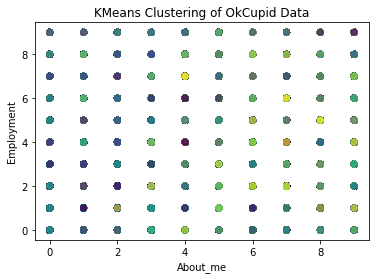

In [45]:
# Create a scatter plot using two features
plt.scatter(features['about_me_cluster_labels'], features['employment_column_labels'], c=labels, cmap='viridis', alpha=0.5)

# Label the axes
plt.xlabel('About_me')
plt.ylabel('Employment')

# Show the plot
plt.title('KMeans Clustering of OkCupid Data')
plt.show()


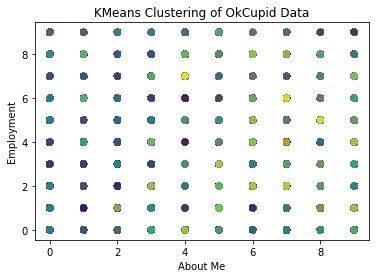

In [46]:
# Select two features for the scatter plot
x = features['about_me_cluster_labels']
y = features['employment_column_labels']

# Create the scatter plot
plt.scatter(x, y, c=labels, alpha=0.5)

# Label the axes
plt.xlabel('About Me')
plt.ylabel('Employment')

# Show the plot
plt.title('KMeans Clustering of OkCupid Data')
plt.show()


In [47]:
# Drop a column in place
okcupid.drop(['about_me', 'employment', 'hobbies', 'appearance', 'fouvourite_music_and_tv', 'likes', 'aspirations', 'weekend', 'fun_fact'], axis=1, inplace=True)

In [48]:
print(okcupid.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59946 entries, 0 to 59945
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   age                                     59946 non-null  int64   
 1   ideal_date                              59946 non-null  int32   
 2   ethnicity                               59946 non-null  int16   
 3   height                                  59946 non-null  float64 
 4   income                                  59946 non-null  int64   
 5   job                                     59946 non-null  int8    
 6   location                                59946 non-null  int16   
 7   offspring                               59946 non-null  int8    
 8   orientation                             59946 non-null  int8    
 9   pets                                    59946 non-null  int8    
 10  religion                                59946 

In [49]:
okcupid.head()

,age,ideal_date,ethnicity,height,income,job,location,offspring,orientation,pets,...,education_rating,about_me_cluster_labels,employment_column_labels,hobbies_cluster_labels,appearance_cluster_labels,fouvourite_music_and_tv_cluster_labels,likes_cluster_labels,aspirations_cluster_labels,weekend_cluster_labels,fun_fact_cluster_labels
0,22,21994,98,75.0,-1,19,175,2,2,14,...,3.0,0,4,3,9,4,9,1,1,1
1,35,43573,215,70.0,80000,8,118,2,2,14,...,16.0,6,4,4,2,8,2,6,1,1
2,38,3056,206,68.0,-1,12,155,4,2,5,...,1.0,0,1,9,3,7,6,6,1,0
3,23,12653,215,71.0,20000,17,16,4,2,10,...,3.0,8,6,5,2,4,0,1,1,0
4,29,43573,22,66.0,-1,11,155,2,2,14,...,0.0,5,2,1,5,3,0,6,1,0


In [50]:
# Labeling the data

'''

import pandas as pd
from sklearn.cluster import KMeans

# Assume 'data' is your DataFrame and 'kmeans' is your fitted KMeans model
data['cluster'] = kmeans.labels_

# Analyze clusters
cluster_summary = data.groupby('cluster').mean()

# Example mapping based on analysis
cluster_labels = {0: 'High Income', 1: 'Low Income', 2: 'Middle Income'}

# Add descriptive labels
data['cluster_label'] = data['cluster'].map(cluster_labels)

'''

"\n\nimport pandas as pd\nfrom sklearn.cluster import KMeans\n\n# Assume 'data' is your DataFrame and 'kmeans' is your fitted KMeans model\ndata['cluster'] = kmeans.labels_\n\n# Analyze clusters\ncluster_summary = data.groupby('cluster').mean()\n\n# Example mapping based on analysis\ncluster_labels = {0: 'High Income', 1: 'Low Income', 2: 'Middle Income'}\n\n# Add descriptive labels\ndata['cluster_label'] = data['cluster'].map(cluster_labels)\n\n"

In [51]:
fig = plt.figure(figsize=(8, 3))

fig.suptitle('Cluser Center', fontsize=14, fontweight='bold')


Text(0.5, 0.98, 'Cluser Center')

<Figure size 576x216 with 0 Axes>

In [52]:
# Scikit-learn sometimes calls centroids “cluster centers”.
# For loop to display each of the cluster_centers:

for i in range(10):
    # Initialize subplots in a grid of 2x5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)

    # Display images
    ax.imshow(kmeans.cluster_centers_[i].reshape((1, 1)), cmap=plt.cm.binary)



In [53]:
cluster_centers = kmeans.cluster_centers_

print(f"{cluster_centers.shape}\n")
print(cluster_centers)


(10, 1)

[[37574.10145428]
 [ 9610.33268245]
 [21562.94807159]
 [ 5657.54224116]
 [33332.01194426]
 [13666.45884924]
 [17696.84461462]
 [29182.03642773]
 [ 1831.80088381]
 [25382.94554707]]


### Visualize After K-Means

# Data transformations for feature analysis

Data Scaling 


In [54]:
from sklearn.preprocessing import StandardScaler


# Select the columns to scale
columns_to_scale = ['age', 'ideal_date', 'ethnicity', 'height', 'income', 'job', 'location', 'offspring', 'orientation', 'pets', 'education_rating', 'about_me_cluster_labels', 'employment_column_labels', 'hobbies_cluster_labels', 'appearance_cluster_labels', 'fouvourite_music_and_tv_cluster_labels', 'likes_cluster_labels', 'aspirations_cluster_labels', 'weekend_cluster_labels', 'fun_fact_cluster_labels']

# Reset the index
okcupid_reset = okcupid.reset_index(drop=True)

# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(okcupid_reset[columns_to_scale])

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

okcupid_reset.head()

,age,ideal_date,ethnicity,height,income,job,location,offspring,orientation,pets,...,education_rating,about_me_cluster_labels,employment_column_labels,hobbies_cluster_labels,appearance_cluster_labels,fouvourite_music_and_tv_cluster_labels,likes_cluster_labels,aspirations_cluster_labels,weekend_cluster_labels,fun_fact_cluster_labels
0,22,21994,98,75.0,-1,19,175,2,2,14,...,3.0,0,4,3,9,4,9,1,1,1
1,35,43573,215,70.0,80000,8,118,2,2,14,...,16.0,6,4,4,2,8,2,6,1,1
2,38,3056,206,68.0,-1,12,155,4,2,5,...,1.0,0,1,9,3,7,6,6,1,0
3,23,12653,215,71.0,20000,17,16,4,2,10,...,3.0,8,6,5,2,4,0,1,1,0
4,29,43573,22,66.0,-1,11,155,2,2,14,...,0.0,5,2,1,5,3,0,6,1,0


# # Further EDA 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the columns to include in the pairplot
columns_to_display = ['age', 'drinks_rating','body_rating', 'diet_rating', 'drugs_rating' , 'education_rating', 'ethnicity', 'height', 'income']

# Create the pairplot with the specified columns
sns.pairplot(okcupid, vars=columns_to_display, hue='education_rating')
plt.show()


In [ ]:
# Specify the columns to include in the pairplot
columns_to_display = ['age', 'drinks_rating','body_rating', 'diet_rating', 'drugs_rating' , 'education_rating', 'ethnicity', 'height', 'income']

correlation_matrix = okcupid_reset[columns_to_display].corr() # calculate the correlation matrix

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')    # create the heat maps. annot=True adds the correlation 
                                                                # values on the heatmap.
                                                                # cmap='coolwarm' sets the color map for the heatmap.
plt.show()




In [ ]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

okcupid.head(10)

In [ ]:
print(okcupid.columns)

In [ ]:
okcupid.drop(['age_group'], axis=1, inplace=True)

'''
In the context of the drop() function in pandas:

inplace=True: This modifies the DataFrame in place, meaning the changes are applied directly to the original DataFrame without needing to assign it back to a variable. If inplace=False (default), the function returns a new DataFrame with the changes, and the original DataFrame remains unchanged.

axis=1: This specifies that the operation should be performed on columns. In pandas, axis=0 refers to rows, and axis=1 refers to columns. So, axis=1 is used when you want to drop columns.
'''

#  Principle Component Analysis 

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd



#Prepare your data: Ensure your data is in a numerical format and standardized (mean = 0, variance = 1) if necessary.

pca = PCA(n_components=2)  # Initialize PCA: Specify the number of components you want to keep.

principal_components = pca.fit_transform(okcupid) # Fit and transform the data:

pca_df = pd.DataFrame(data = principal_components, columns=['PC1', 'PC2']) 

print(pca.explained_variance_ratio_) # Analyze the results: Check the explained variance ratio to understand how much variance each component captures.

pca_df.head()

In [ ]:

# Plot the cluster centers
plt.scatter(principal_components[:, 0], principal_components[:, 1], c='red', marker='.', s=20, label='Cluster Centers')

# Label the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
plt.legend()

# Show the plot
plt.title('Cluster Centers in Reduced Dimensionality Space')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, c='blue')  # Adjust 'alpha' and 'c' to customize the plot
plt.title('Scatter Plot of PCA Results')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()


In [ ]:
ax = plt.axes((0,0, 2.5, 2.5))

sns.scatterplot(data=kmeans, x = pca_df['PC1'], y = pca_df['PC2'], size = 1, ax = ax)

In [ ]:
ax = plt.axes((0,0, 2.5, 2.5))

sns.scatterplot(data=kmeans, x = pca_df['PC1'], y = pca_df['PC2'], size = 1, ax = ax)

Adding labels to clusters

To label clusters generated from an unsupervised learning algorithm like k-means, follow these steps:

Examine Cluster Centers:

Use the cluster_centers_ attribute of the k-means model to examine the center of each cluster. This gives an idea of the average feature values for each cluster.
Analyze Cluster Data:

Calculate summary statistics (e.g., mean, median) for each feature within each cluster to understand their characteristics.
Use pandas to group data by cluster labels and describe the features.
Visualize Clusters:

Use visualization tools like matplotlib or seaborn to plot the clusters and identify patterns.
Assign Descriptive Labels:

Based on the analysis, assign descriptive labels to each cluster. For example, if a cluster has high average income, label it “High Income.”
Add Labels to Data:

Create a mapping of cluster numbers to descriptive labels.
Use this mapping to add a new column to your DataFrame with the descriptive labels.

machine learning fundamentals 
        EDA for machine learning models
        Feature engineering 
        Data transformations



The Machine Learning Process

1)Formulating a Question

The choosen 'target variables' will be 'ideal date' and 'aspirations' as these are dependent variables. 

I would be informative to draw comparison between other variale for example, relationship between: 
   - last online v status
   - smokes v status 
           etc...
           
ideally we want to find the otimium feature which will make a relationship most likely?

2)Finding and Understanding the Data

-Calculate means and medians to understand the distribution
-Calculate percentiles
-Find correlations that indicate relationships
    - 
3)Cleaning the Data and Feature Engineering

We might try:

-Normalizing or standardizing the data
-Augmenting the data by adding new columns
-Removing unnecessary columns

4)Choosing a Model

5)Tuning and Evaluating

6)Using the Model and Presenting Results



Free-text is common within a dataset and as our 'value count' indicates almost every data entry is unique. 

Below’s an example of how you can use k-means clustering on a single column and then apply a supervised learning algorithm using Python:


# Data Visualisation

In [ ]:
# Numerical colums

plt.figure(figsize=(8,6))
sns.distplot(okcupid_reset.age, rug = True, kde=False)
plt.xlabel("age of participant");

plt.figure(figsize=(8,6))
sns.distplot(okcupid_reset.income, rug = True, kde=False)
plt.xlabel("income");

plt.figure(figsize=(8,6))
sns.distplot(okcupid_reset.height, rug = True, kde=False)
plt.xlabel("height");

In [ ]:
plt.figure(figsize=(8, 6))

# Overlayed distribution plots
sns.histplot(okcupid_reset.age, color='blue', label='Age', kde=False, element='step', stat='density')
sns.histplot(okcupid_reset.income, color='green', label='Income', kde=False, element='step', stat='density')
sns.histplot(okcupid_reset.height, color='red', label='Height', kde=False, element='step', stat='density')

plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.title("Overlayed Distributions of Age, Income, and Height")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 1, figsize=(8, 18))

# Plot for Age
sns.histplot(okcupid_reset.age, color='blue', label='Age', kde=False, element='step', stat='density', ax=axes[0])
axes[0].set_xlim(min(okcupid_reset.age), max(okcupid_reset.age))  # Adjust the x-axis range for age
axes[0].set_title("Distribution of Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Density")
axes[0].legend()

# Plot for Income
sns.histplot(okcupid_reset.income, color='green', label='Income', kde=False, element='step', stat='density', ax=axes[1])
axes[1].set_xlim(min(okcupid_reset.income), max(okcupid_reset.income))  # Adjust the x-axis range for income
axes[1].set_title("Distribution of Income")
axes[1].set_xlabel("Income")
axes[1].set_ylabel("Density")
axes[1].legend()

# Plot for Height
sns.histplot(okcupid_reset.height, color='red', label='Height', kde=False, element='step', stat='density', ax=axes[2])
axes[2].set_xlim(min(okcupid_reset.height), max(okcupid_reset.height))  # Adjust the x-axis range for height
axes[2].set_title("Distribution of Height")
axes[2].set_xlabel("Height")
axes[2].set_ylabel("Density")
axes[2].legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize each variable so their densities are comparable
normalized_age = okcupid_reset.age / max(okcupid_reset.age)
normalized_income = okcupid_reset.income / max(okcupid_reset.income)
normalized_height = okcupid_reset.height / max(okcupid_reset.height)

plt.figure(figsize=(8, 6))

# Overlayed normalized distribution plots
sns.histplot(normalized_age, color='blue', label='Age', kde=False, element='step', stat='density')
sns.histplot(normalized_income, color='green', label='Income', kde=False, element='step', stat='density')
sns.histplot(normalized_height, color='red', label='Height', kde=False, element='step', stat='density')

plt.xlabel("Normalized Value")
plt.ylabel("Density")
plt.legend()
plt.title("Overlayed Normalized Distributions of Age, Income, and Height")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot to show relationships between age, income, and height
sns.pairplot(okcupid_reset, vars=['age', 'income', 'height'], diag_kind='kde', corner=True)

plt.suptitle("Relationships Between Age, Income, and Height", y=1.02)
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(okcupid_reset.age, okcupid_reset.income, okcupid_reset.height, alpha=0.6, c='blue')

ax.set_xlabel("Age")
ax.set_ylabel("Income")
ax.set_zlabel("Height")
ax.set_title("3D Visualization: Age vs Income vs Height")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Scatter plot
ax.scatter(okcupid_reset.age, okcupid_reset.height, alpha=0.6, c='blue')

ax.set_xlabel("Age")
ax.set_ylabel("Height")
ax.set_title("2D Visualization: Age vs Height")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each value
value_counts = okcupid_reset['status'].value_counts()

# Calculate percentages
percentages = (value_counts / len(okcupid_reset)) * 100

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Values in Category Column')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each value
value_counts = okcupid_reset['sex'].value_counts()

# Calculate percentages
percentages = (value_counts / value_counts.sum()) * 100

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Each Category in Category Column')
plt.show()


In [ ]:
okcupid_reset.sex.value_counts(normalize=True)

# Usful relationships

  age                                    
 1   ideal_date                              
 2   ethnicity                               
 3   height                                
 4   income                                  
 5   job                                      
 6   location                                
 7   offspring                                
 8   orientation                              
 9   pets                                     
 10  religion                                 
 11  sex                                      
 12  sign                                     
 13  smokes                                   
 14  speaks                                  
 15  status                                   
 16  month                                    
 17  day                                      
 18  year                                     
 19  hour                                     
 20  minute                                  
 21  body_rating                           
 22  diet_rating                      
 23  drinks_rating                     
 24  drugs_rating                       
 25  education_rating                        
 26  about_me_cluster_labels                   
 27  employment_column_labels                  
 28  hobbies_cluster_labels                    
 29  appearance_cluster_labels                 
 30  fouvourite_music_and_tv_cluster_labels    
 31  likes_cluster_labels                    
 32  aspirations_cluster_labels                
 33  weekend_cluster_labels                   -    
 34  fun_fact_cluster_labels                 

# The Machine Learning Model 


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

feature_cols = ['age', 'drinks_rating','body_rating', 'diet_rating', 'drugs_rating' , 'education_rating', 'ethnicity', 'height', 'income']

X = pd.get_dummies(okcupid[feature_cols], drop_first=True)

#print(X)

In [ ]:
#Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greater than 50k

#y = okcupid['sex']     #.apply(lambda x: 1 if x == '>50K' else 0)

y = okcupid['sex'].astype(int)

# Decision Trees

In [ ]:
# Split the data into a train and test set

train_data, test_data, train_labels, test_labels = train_test_split(X, y, random_state=1, test_size=.4)

In [ ]:
#Fit a decision tree for max_depth values 1-20; save the accuracy score in acc_depth

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

depths = range(1, 21)
acc_depth = []
for i in depths:
    dt = DecisionTreeClassifier(random_state = 10, max_depth = i)
    dt.fit(train_data, train_labels)
    acc_depth.append(dt.score(test_data, test_labels))

In [ ]:
#Plot the accuracy vs depth
plt.plot(depths, acc_depth)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [ ]:
#Find the largest accuracy and the depth this occurs
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]
print(f'Highest accuracy {round(max_acc,3)*100}% at depth {best_depth}')

In [ ]:
#Refit decision tree model with the highest accuracy and plot the decision tree
plt.figure(figsize=(14,8))
dt = DecisionTreeClassifier(random_state = 1, max_depth = best_depth)
dt.fit(train_data, train_labels)
tree.plot_tree(dt, feature_names = train_data.columns,  
               class_names = ['M', 'F'],
                filled=True)
plt.show()

In [ ]:
#Create a new list for the accuracy values of a pruned decision tree.  Loop through
#the values of ccp and append the scores to the list

acc_pruned = []
ccp = np.logspace(-3, 0, num=20)
for i in ccp:
    dt_prune = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=i)
    dt_prune.fit(train_data, train_labels)
    acc_pruned.append(dt_prune.score(test_data, test_labels))

plt.plot(ccp, acc_pruned)
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.show()

In [ ]:
#Find the largest accuracy and the ccp value this occurs
max_acc_pruned = np.max(acc_pruned)
best_ccp = ccp[np.argmax(acc_pruned)]

print(f'Highest accuracy {round(max_acc_pruned,3)*100}% at ccp_alpha {round(best_ccp,4)}')



In [ ]:
#Fit a decision tree model with the values for max_depth and ccp_alpha found above
dt_final = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=best_ccp)
dt_final.fit(train_data, train_labels)



In [ ]:
#Plot the final decision tree
plt.figure(figsize=(14,8))
tree.plot_tree(dt_final, feature_names = train_data.columns,  
               class_names = ['M', 'F'],
                filled=True)
plt.show()

In [ ]:
# Make predictions on the test data
predictions = dt.predict(test_data)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for Decision Tree (Depth={best_depth})')
plt.show()


In [ ]:
# Calculate accuracy
# Accuracy is calculated by finding the total number of correctly classified predictions (true positives and true negatives) 
# and dividing by the total number of predictions.

accuracy = accuracy_score(test_labels, predictions)

print(f'Accuracy for Decision Tree (Depth={best_depth}): {accuracy:.2f}')

In [ ]:
# calculate the Recall
# Accuracy can be misleading, 
# recall = true_positives/(true_positives + false_negatives) 
# this would be the number of correctly labeled spam emails divided by all the emails that were actually spam in the dataset.

from sklearn.metrics import recall_score

recall = recall_score(test_labels, predictions, average='binary')

print(f'Recall for Decision Tree (Depth={best_depth}): {recall:.2f}')

In [ ]:
# Calculate precision
# Precision measures the proportion of positive identifications that were actually correct.
# precision = true_positives/(true_positives + false_positives)
#  precision is particularly useful when the cost of false positives is high, 
# and it helps ensure that positive predictions are trustworthy.

precision = precision_score(test_labels, predictions, average='binary')

print(f'Precision for Decision Tree (Depth={best_depth}): {precision:.2f}')

In [ ]:
# Calculate F1 score
# f_1 = 2*precision*recall/(precision+recall)
# Arithmetic mean = precision*recall / 2
# The F1-score combines both precision and recall into a single statistic, by determining their harmonic mean. The harmonic mean is a 
# method of averaging.

# Calculate F1 score
f1 = f1_score(test_labels, predictions, average='binary')

print(f'F1 Score for Decision Tree (Depth={best_depth}): {f1:.2f}')

#  Random Forest Classifier

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

feature_cols = ['age', 'drinks_rating','body_rating', 'diet_rating', 'drugs_rating' , 'education_rating', 'ethnicity', 'height', 'income']
   

#Create feature dataframe X with feature columns and dummy variables for categorical features
X = pd.get_dummies(okcupid[feature_cols])

#Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greather than 50k

y_status = okcupid['status'] 

#Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y_status, random_state=1, test_size=.4)




In [ ]:
okcupid['status'].value_counts()

In [ ]:
#Instantiate random forest classifier, fit and score with default parameters
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_test, y_test)
print(f'Accuracy score for default random forest: {round(rf.score(x_test, y_test)*100,3)}%')

#Tune the hyperparameter max_depth over a range from 1-25, save scores for test and train set
np.random.seed(0)
accuracy_train=[]
accuracy_test = []
depths = range(1,26)
for i in depths:
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    accuracy_test.append(accuracy_score(y_test, rf.predict(x_test)))
    accuracy_train.append(accuracy_score(y_train, rf.predict(x_train)))
    
#Find the best accuracy and at what depth that occurs
best_acc= np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print(f'The highest accuracy on the test is achieved when depth: {best_depth}')
print(f'The highest accuracy on the test set is: {round(best_acc*100,3)}%')






In [ ]:
# Evaluate the predictions of the model on the test set. Print the confusion matrix and accuracy score.

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_pred, y_test)

print('Confusion Matrix on test set:')
print(conf_matrix)

In [ ]:
#Plot the accuracy scores for the test and train set over the range of depth values  
plt.plot(depths, accuracy_test,'bo--',depths, accuracy_train,'r*:')
plt.legend(['test accuracy', 'train accuracy'])
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()



In [ ]:
#Save the best random forest model and save the feature importances in a dataframe
best_rf = RandomForestClassifier(max_depth=best_depth)
best_rf.fit(x_train, y_train)
feature_imp_df = pd.DataFrame(zip(x_train.columns, best_rf.feature_importances_),  columns=['feature', 'importance'])
print('Top 9 random forest features:')
print(feature_imp_df.sort_values('importance', ascending=False).iloc[0:9])

Adpative boosting 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create a decision stump base model using the Decision Tree Classifier
decision_stump = DecisionTreeClassifier(max_depth=1)

# Print the parameters of the decision stump
print(decision_stump.get_params())


In [ ]:
# Create an AdaBoost classifier using the decision stump as the base estimator
ada_classifier = AdaBoostClassifier(estimator=decision_stump, n_estimators=5)

# Print the parameters of the AdaBoost model
print(ada_classifier.get_params())



In [ ]:
# Fit the AdaBoost classifier to the training data
ada_classifier.fit(x_train, y_train)

# Predict the classes of the testing dataset
y_pred = ada_classifier.predict(x_test)


In [ ]:
# Calculate the accuracy, precision, recall, and f1-score on the testing data
accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)
#f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Test set accuracy:\t{accuracy}')
#print(f'Test set precision:\t{precision}')
#print(f'Test set recall:\t{recall}')
#print(f'Test set f1-score:\t{f1}')



In [ ]:
# Remove the comments from the following code block to print the confusion matrix

test_conf_matrix = pd.DataFrame(
     confusion_matrix(y_test, y_pred, labels=[1, 0]), 
     index=['actual yes', 'actual no'], 
     columns=['predicted yes', 'predicted no']
 )
print(f'Confusion Matrix:\n{test_conf_matrix.to_string()}')

## Model Evaluation

In [ ]:
# Print the accuracy score
print('Accuracy Score on test set:')
print(accuracy_score(y_test, y_pred))

In [ ]:
# Create a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

# Assuming y_test contains the true values
plt.scatter(range(len(y_pred)), y_pred, label="Predictions", color="blue")
plt.scatter(range(len(y_test)), y_test, label="Actual values", color="red")

plt.xlabel("Sample index")
plt.ylabel("Value")
plt.title("Model Predictions vs Actual Values")
plt.legend()
plt.show()